In [ ]:
import numpy as np # math module
import matplotlib.pyplot as plt # plotting module
from scipy.integrate import solve_ivp #needed for graphing 2nd dif eq

C:\Users\New\AppData\Local\Temp\ipykernel_8024\1037012250.py:5: RuntimeWarning: divide by zero encountered in divide
  return 1 / (1 + np.sin(x))
C:\Users\New\AppData\Local\Temp\ipykernel_8024\1037012250.py:20: RuntimeWarning: invalid value encountered in divide
  V_norm = V / N
C:\Users\New\AppData\Local\Temp\ipykernel_8024\1037012250.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / (1 + np.sin(x))


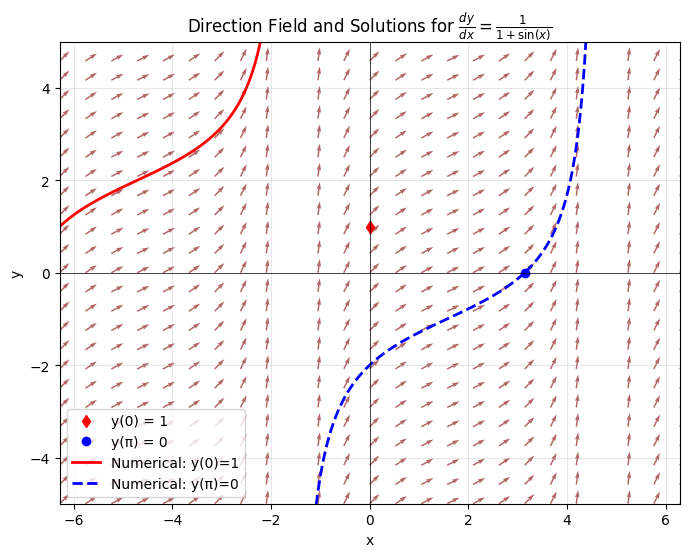

In [9]:
""" graph for dy/dx = 1/1+sin(x)"""

# Define what a differential equation is
def dydx(x, y):
    return 1 / (1 + np.sin(x))

# x and y ranges for the direction field
#grid for arrows
x_vals = np.linspace(-2*np.pi, 2*np.pi, 25)
y_vals = np.linspace(-5, 5, 25)
X, Y = np.meshgrid(x_vals, y_vals)

# Direction field components
U = np.ones_like(X)
V = dydx(X, Y)

# Makes all arrows the same size
N = np.sqrt(U**2 + V**2)
U_norm = U / N
V_norm = V / N

# actual plot for the direction field
plt.figure(figsize=(8, 6)) # size range for both axis
plt.quiver(X, Y, U_norm, V_norm, color="maroon", alpha=0.6) #quiver is the command for a graph, it is the data being graphed.

# Plot initial condition points
plt.plot(0, 1, 'rd', label='y(0) = 1')       # location, red diamond, label for point
plt.plot(np.pi, 0, 'bo', label='y(π) = 0')   # location, blue circle, lable for point

# Define x domain for solution curves
x_span = np.linspace(-2*np.pi, 2*np.pi, 1000)

"""Initial conditions"""
# Solve and plot y(0) = 1
sol1 = solve_ivp(dydx, [x_span[0], x_span[-1]], [1], t_eval=x_span, rtol=1e-6)
plt.plot(sol1.t, sol1.y[0], 'r-', linewidth=2, label='Numerical: y(0)=1')

# Solve and plot y(π) = 0
# Since π isn’t the left endpoint, solve forward and backward from π
sol2_forward = solve_ivp(dydx, [np.pi, x_span[-1]], [0], t_eval=x_span[x_span >= np.pi], rtol=1e-6)
sol2_backward = solve_ivp(dydx, [np.pi, x_span[0]], [0], t_eval=x_span[x_span <= np.pi][::-1], rtol=1e-6)

# Plot both halves of the solution from y(π) = 0
plt.plot(sol2_forward.t, sol2_forward.y[0], 'b--', linewidth=2) #use solution sol#_forwad
plt.plot(sol2_backward.t, sol2_backward.y[0], 'b--', linewidth=2, label='Numerical: y(π)=0')

# show plot
plt.title(r"Direction Field and Solutions for $\frac{dy}{dx} = \frac{1}{1 + \sin(x)}$")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5) #axis lines
plt.axvline(0, color='black', linewidth=0.5) #axis lines
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-2*np.pi, 2*np.pi)
plt.ylim(-5, 5)
plt.show()

**Explanation for dy/dx = 1/1+sin(x)**

**Desmos Check:**

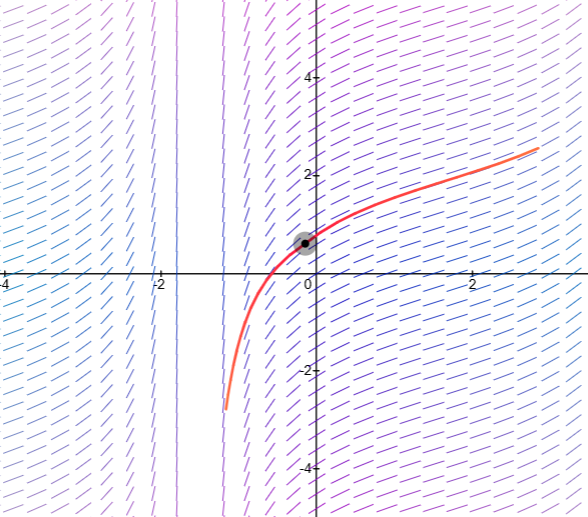

$$
\frac{dy}{dx} = \frac{1}{1 + \sin(x)}, \quad y(0) = 1, \quad y(\pi) = 0
$$

$$
y(x) = \int \frac{1}{1 + \sin(x)} \, dx + C
$$


$$
\int \frac{1}{1 + \sin(x)} \, dx = \ln \left| \tan\left( \frac{x}{2} \right) + 1 \right| + C
$$

So:

$$
y(x) = \ln \left| \tan\left( \frac{x}{2} \right) + 1 \right| + C
$$

Apply initial condition \( y(0) = 1 \)

$$
1 = \ln(1 + \tan(0)) + C = \ln(1) + C = 0 + C \Rightarrow C = 1
$$


$$
{y(x) = \ln \left| \tan\left( \frac{x}{2} \right) + 1 \right| + 1}
$$



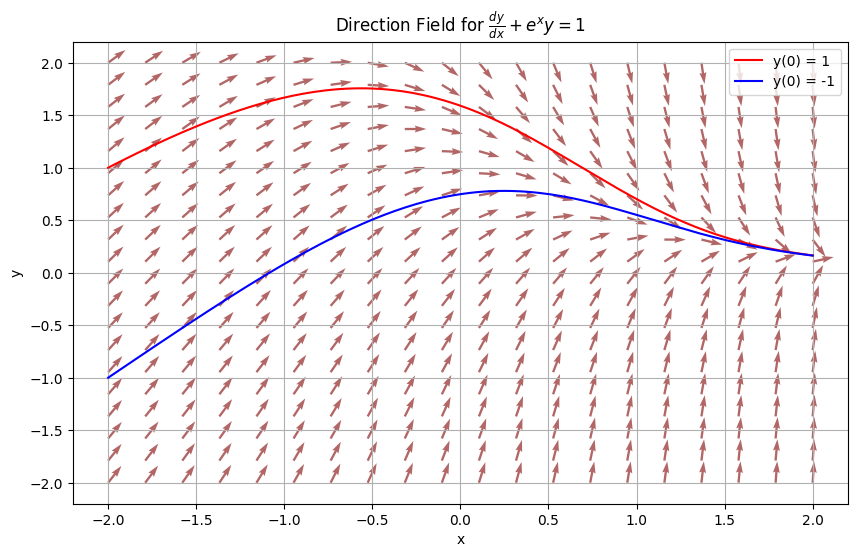

In [12]:
""" for dy/dx + (e^x)y = 1"""

#Define the ODE: dy/dx + e^x * y = 1  to dy/dx = 1 - e^x * y
def dydx(x, y):
    return 1 - np.exp(x) * y

#Create grid for direction field
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)

#Calculate slope at each point
U = np.ones_like(X)
V = dydx(X, Y)

#Normalize vectors
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

#Plot direction field
plt.figure(figsize=(10, 6))
plt.quiver(X, Y, U, V, color='maroon', alpha=0.6)
plt.title(r"Direction Field for $\frac{dy}{dx} + e^x y = 1$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

#Solve ODE for y(0) = 1
sol1 = solve_ivp(dydx, [x_vals[0], x_vals[-1]], [1], t_eval=np.linspace(x_vals[0], x_vals[-1], 200))
plt.plot(sol1.t, sol1.y[0], 'r-', label='y(0) = 1')

#Solve ODE for y(0) = -1
sol2 = solve_ivp(dydx, [x_vals[0], x_vals[-1]], [-1], t_eval=np.linspace(x_vals[0], x_vals[-1], 200))
plt.plot(sol2.t, sol2.y[0], 'b-', label='y(0) = -1')

#Show
plt.legend()
plt.show()

**Explanation for dy/dx+e^x*y = 1**

**Desmos Check:**

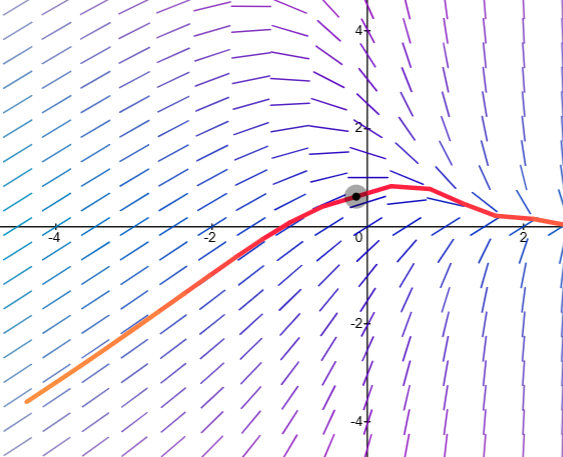

$$
\frac{dy}{dx} + e^x y = 1, \quad y(0) = 1
$$

This is a linear first-order ODE. Use the standard form:

$$
\frac{dy}{dx} + P(x)y = Q(x)
$$

$$
\mu(x) = e^{\int e^x dx} = e^{e^x}
$$

$$
e^{e^x} \frac{dy}{dx} + e^{e^x} e^x y = e^{e^x}
$$

The left-hand side is the derivative of:

$$
\frac{d}{dx} \left( e^{e^x} y \right) = e^{e^x}
$$

$$
e^{e^x} y = \int e^{e^x} dx + C
$$

$$
y(x) = \frac{\int e^{e^x} dx + C}{e^{e^x}}
$$

Apply the initial condition \( y(0) = 1 \)

$$
1 = \frac{I_0 + C}{e} \Rightarrow C = e - I_0
$$

$$
{ y(x) = \frac{\int e^{e^x} dx + \left( e - \int e^{e^x} dx \big|_{x=0} \right)}{e^{e^x}} }
$$

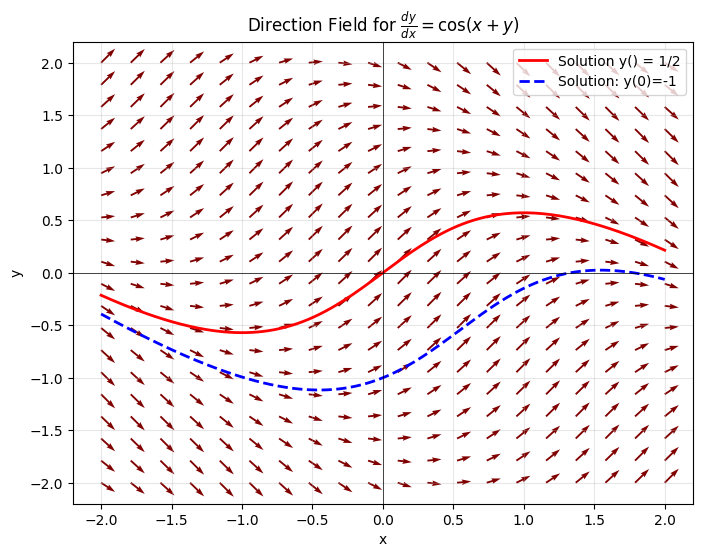

In [11]:
"""Direction field for dy/dx = cos(x+y)"""

#grid for arrows
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# 2. Compute the slope at each point: dy/dx = cos(x + y).
U = np.ones_like(X)           # dx component
V = np.cos(X + Y)             # dy component is = to function

"""Initial conditions"""
C = 0
x_line = np.linspace(-2, 2, 200)
y_line = 2*np.arctan(x_line + C) - x_line

C_alt = -np.tan(0.5)
x_line_alt = np.linspace(-2, 2, 300)
y_line_alt = 2*np.arctan(x_line_alt + C_alt) - x_line_alt


plt.figure(figsize=(8,6))
plt.quiver(X, Y, U, V, color='maroon')

#IC's plot:
plt.plot(x_line, y_line, 'r-', linewidth=2, label='Solution y() = 1/2')
plt.plot(x_line_alt, y_line_alt, 'b--', linewidth=2, label='Solution: y(0)=-1')

#Show plot
plt.title(r"Direction Field for $\frac{dy}{dx} = \cos(x + y)$")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

**Explanation for dy/dx = cos(x+y)**

**Desmos Check:**

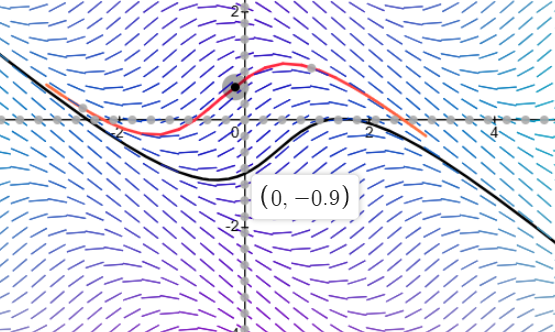

$$
\frac{dy}{dx} = \cos(x + y), \quad y(0) = -1
$$

Let:

$$
u = x + y \quad \Rightarrow \quad \frac{du}{dx} = 1 + \frac{dy}{dx}
$$

$$
\frac{dy}{dx} = \cos(u)
$$

So:

$$
\frac{du}{dx} = 1 + \cos(u)
$$

$$
\frac{1}{1 + \cos(u)} \, du = dx
$$

Use identity:

$$
1 + \cos(u) = 2 \cos^2\left( \frac{u}{2} \right)
$$

Thus:

$$
\int \frac{1}{1 + \cos(u)} \, du = \int \frac{1}{2} \sec^2\left( \frac{u}{2} \right) \, du
$$

So,

$$
\int \frac{1}{2} \sec^2(w) \cdot 2 \, dw = \int \sec^2(w) \, dw = \tan(w) + C
$$


**Final implicit solution:**

$$
{ \tan\left( \frac{x + y}{2} \right) = x + C }
$$

Apply initial condition \( y(0) = -1 \)

$$
\tan\left( \frac{0 + (-1)}{2} \right) = \tan(-0.5) \approx -0.5463
$$

So,

$$
x + C = -0.5463 \Rightarrow C = -0.5463
$$

